# Glioma Grading Clinical and Mutation Features
## Importing Libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Reading data

In [68]:
glioma_data = pd.read_csv("TCGA_InfoWithGrade.csv")

## Separating data into training and test

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

values = glioma_data[
    [
        "Gender",
        "Age_at_diagnosis",
        "Race",
        "IDH1",
        "TP53",
        "ATRX",
        "PTEN",
        "EGFR",
        "CIC",
        "MUC16",
        "PIK3CA",
        "NF1",
        "PIK3R1",
        "FUBP1",
        "RB1",
        "NOTCH1",
        "BCOR",
        "CSMD3",
        "SMARCA4",
        "GRIN2A",
        "IDH2",
        "FAT4",
        "PDGFRA",
    ]
]

target = glioma_data["Grade"]

(training_values,
 testing_values,
 training_target,
 testing_target) = train_test_split(values, target, test_size=0.25, random_state=1)



# K-Nearest Neighbours

Accuracy: 0.7666666666666667
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       115
           1       0.76      0.72      0.74        95

    accuracy                           0.77       210
   macro avg       0.77      0.76      0.76       210
weighted avg       0.77      0.77      0.77       210

[[93 22]
 [27 68]]


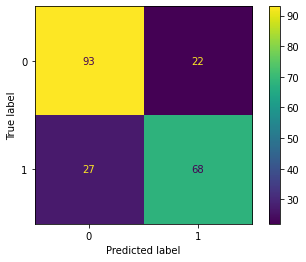

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(training_values, training_target)

target_pred = knn.predict(testing_values)

accuracy = accuracy_score(testing_target, target_pred)

print(f"Accuracy: {accuracy}")

print(classification_report(testing_target, target_pred))

print(confusion_matrix(testing_target, target_pred))
disp = ConfusionMatrixDisplay(confusion_matrix(testing_target, target_pred))
disp.plot()


## SVM
### Linear kernel

In [71]:
from sklearn.svm import SVC

svm_model = SVC(kernel="linear")

svm_model.fit(training_values, training_target)

target_pred = svm_model.predict(testing_values)

accuracy = accuracy_score(testing_target, target_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(testing_target, target_pred))

print(confusion_matrix(testing_target, target_pred))

Accuracy: 0.861904761904762
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       115
           1       0.82      0.89      0.85        95

    accuracy                           0.86       210
   macro avg       0.86      0.86      0.86       210
weighted avg       0.87      0.86      0.86       210

[[96 19]
 [10 85]]


### Sigmoid kernel

In [72]:
svm_model = SVC(kernel="sigmoid")

svm_model.fit(training_values, training_target)

target_pred = svm_model.predict(testing_values)

accuracy = accuracy_score(testing_target, target_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(testing_target, target_pred))

print(confusion_matrix(testing_target, target_pred))

Accuracy: 0.37142857142857144
              precision    recall  f1-score   support

           0       0.44      0.53      0.48       115
           1       0.24      0.18      0.20        95

    accuracy                           0.37       210
   macro avg       0.34      0.35      0.34       210
weighted avg       0.35      0.37      0.36       210

[[61 54]
 [78 17]]


### Polynomial kernel

In [73]:
svm_model = SVC(kernel="poly")

svm_model.fit(training_values, training_target)

target_pred = svm_model.predict(testing_values)

accuracy = accuracy_score(testing_target, target_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(testing_target, target_pred))

print(confusion_matrix(testing_target, target_pred))

Accuracy: 0.6904761904761905
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       115
           1       0.72      0.52      0.60        95

    accuracy                           0.69       210
   macro avg       0.70      0.68      0.67       210
weighted avg       0.70      0.69      0.68       210

[[96 19]
 [46 49]]


### Radial Basis Function kernel

In [74]:
svm_model = SVC(kernel="rbf")

svm_model.fit(training_values, training_target)

target_pred = svm_model.predict(testing_values)

accuracy = accuracy_score(testing_target, target_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(testing_target, target_pred))

print(confusion_matrix(testing_target, target_pred))

Accuracy: 0.6904761904761905
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       115
           1       0.71      0.54      0.61        95

    accuracy                           0.69       210
   macro avg       0.69      0.68      0.68       210
weighted avg       0.69      0.69      0.68       210

[[94 21]
 [44 51]]


## Decision trees

In [87]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=5, random_state=1)

decision_tree.fit(training_values, training_target)

target_pred = decision_tree.predict(testing_values)

accuracy = accuracy_score(testing_target, target_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(testing_target, target_pred))

print(confusion_matrix(testing_target, target_pred))

Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       115
           1       0.82      0.88      0.85        95

    accuracy                           0.86       210
   macro avg       0.86      0.86      0.86       210
weighted avg       0.86      0.86      0.86       210

[[96 19]
 [11 84]]


## Random Forests

In [91]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=1)

random_forest.fit(training_values, training_target)

training_target_pred = random_forest.predict(training_values)
test_target_pred = random_forest.predict(testing_values)

accuracy = accuracy_score(training_target, training_target_pred)
print(f"Training Accuracy: {accuracy}")
accuracy = accuracy_score(testing_target, test_target_pred)
print(f"Test Accuracy: {accuracy}")

print(classification_report(testing_target, test_target_pred))

print(confusion_matrix(testing_target, test_target_pred))

Training Accuracy: 0.875993640699523
Test Accuracy: 0.8285714285714286
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       115
           1       0.81      0.81      0.81        95

    accuracy                           0.83       210
   macro avg       0.83      0.83      0.83       210
weighted avg       0.83      0.83      0.83       210

[[97 18]
 [18 77]]
